In [1]:
import numpy as np
import matplotlib.pyplot as plt
import asp_func as f

# New functions

In [2]:
def R_matrix(acr_vals):
    N = len(acr_vals)
    R = np.zeros((N,N))
    for i in range(N):
        R[:,i] = np.roll(acr_vals, i)
    return R

# ASP Week 8 - Wiener Filters and Eigenanalysis / Performance Surface

### Problem 4.1

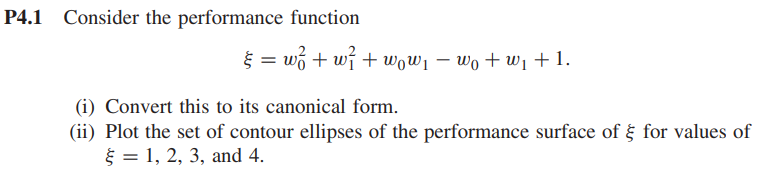

The canonical form of a performance function is given by equation 4.94:

$$
\xi = \xi_{min} + \sum_{i=0}^{N-1} \lambda_i v_i'^2
$$

Where:

$$
\xi_{min} = E[d^2(n)] - \vec{w_o}^T\textbf{R}\vec{w_o}
$$

We have here a two-tap transversal Wiener filter with filter coefficients: $\omega_0, \omega_1$

The performance function has been constructed using equation 4.81:

$$
\xi = \vec{w}^T\textbf{R}\vec{w} - 2\vec{p}^T\vec{w} + E[d^2(n)]
$$

Since the correlation matrix is per definition symmetric, it can be identified:

$$
\xi = 
\begin{bmatrix}
w_0 & w_1
\end{bmatrix}
\begin{bmatrix}
1 & 0.5\\
0.5 & 1
\end{bmatrix}
\begin{bmatrix}
w_0\\
w_1
\end{bmatrix}
-
2
\begin{bmatrix}
0.5 & -0.5
\end{bmatrix}
\begin{bmatrix}
w_0\\
w_1
\end{bmatrix}
+ 1
$$

In [3]:
R = np.array([[1,0.5],[0.5,1]]) #Per definition symmetric
eigvals, eigvecs = np.linalg.eig(R)
print("--------------------------")
for x, e in enumerate(eigvals):
    print("#{n} eigenvalue:".format(n=x), e)
print("--------------------------")
for x, e in enumerate(eigvecs):
    print("#{n} eigenvector:".format(n=x), e.round(3))
print("--------------------------")

--------------------------
#0 eigenvalue: 1.5
#1 eigenvalue: 0.5000000000000001
--------------------------
#0 eigenvector: [ 0.707 -0.707]
#1 eigenvector: [0.707 0.707]
--------------------------


In [4]:
#Decomposition
Λ = np.diag(eigvals)
Q = eigvecs
R_recon = Q@Λ@Q.T
print(R_recon)
p = np.array([0.5, -0.5])[:,np.newaxis] #Cross correlation vector
print(p)

[[1.  0.5]
 [0.5 1. ]]
[[ 0.5]
 [-0.5]]


In [5]:
w0 = np.linalg.inv(R)@p #Optimum filter tap coefficients
w0

array([[ 1.],
       [-1.]])

In [6]:
ξ_min = 1 + np.squeeze(w0.T@R@w0)
ξ_min

2.0

In [7]:
#Transformed performance space vectors
v_prime_1 = Q.T@eigvecs[:,0]
v_prime_2 = Q.T@eigvecs[:,1]

In [8]:
ξ = ξ_min + (eigvals[0] * v_prime_1@v_prime_1.T + eigvals[1] * v_prime_2@v_prime_2.T)
ξ.round(3)

4.0

The minimum performance function corresponding to when $\vec{w}=\vec{w_o}$ is:

$$
\xi_{min} = w_0^2 + w_1^2 +w_0w_1
$$

Hence the canonical form 

### Problem 4.2

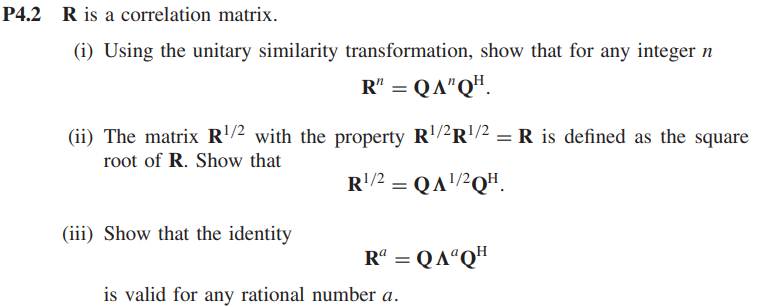

### Problem 4.6

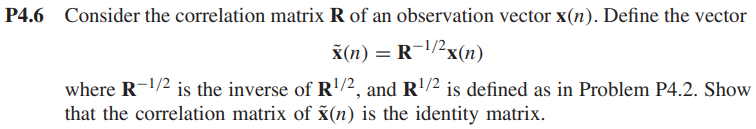

### Problem 4.15

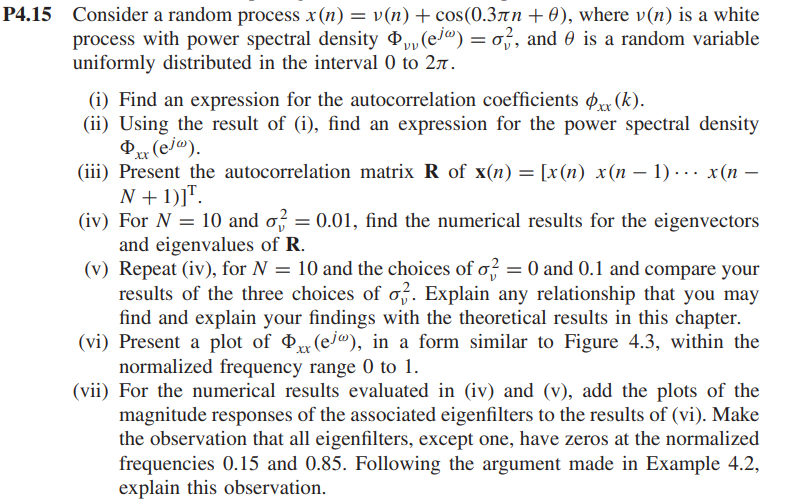

In [9]:
# IV and V
N = 10
mu = 0
var = [0, 0.01, 0.1]
for v in var:
    std = np.sqrt(v)
    vn = np.random.normal(mu, std, N)
    n = np.linspace(0,N-1,N)
    phi = np.random.uniform(0, 2*np.pi, N)
    xn = vn + np.cos(0.3*np.pi*n + phi)
    acr, lag = f.autocorrelation(xn, N-1)
    acr_pos = np.flip(acr[:N])
    Rxx = R_matrix(acr_pos)
    evals, evecs = np.linalg.eig(Rxx)
    print("---------------------------------------------------------------------------------------")
    print("Eigenvalues for σ^2 = {variance}".format(variance=v))
    print(evals)
    # print("Eigenvectors for σ^2 = {variance}".format(variance=v))
    # print(evecs)

---------------------------------------------------------------------------------------
Eigenvalues for σ^2 = 0
[1.0896807 +0.04782453j 1.0896807 -0.04782453j 0.2928566 +0.27339712j
 0.2928566 -0.27339712j 0.54855621+0.j         0.44841388+0.13995733j
 0.44841388-0.13995733j 0.31341617+0.09963499j 0.31341617-0.09963499j
 0.32959081+0.j        ]
---------------------------------------------------------------------------------------
Eigenvalues for σ^2 = 0.01
[0.86568006+0.0967003j  0.86568006-0.0967003j  0.64484286+0.j
 0.21105322+0.24144731j 0.21105322-0.24144731j 0.39821599+0.j
 0.21530388+0.05064328j 0.21530388-0.05064328j 0.29311376+0.04487149j
 0.29311376-0.04487149j]
---------------------------------------------------------------------------------------
Eigenvalues for σ^2 = 0.1
[0.70204412+0.40688643j 0.70204412-0.40688643j 0.32848561+0.03624726j
 0.32848561-0.03624726j 0.45216796+0.1610614j  0.45216796-0.1610614j
 0.60491443+0.j         0.54759608+0.0644577j  0.54759608-0.064457

### Problem 4.18

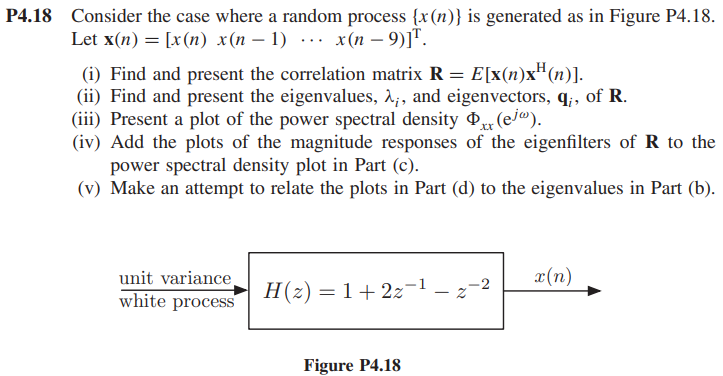

# ASP Week 8 - Search Methods

### Problem 1
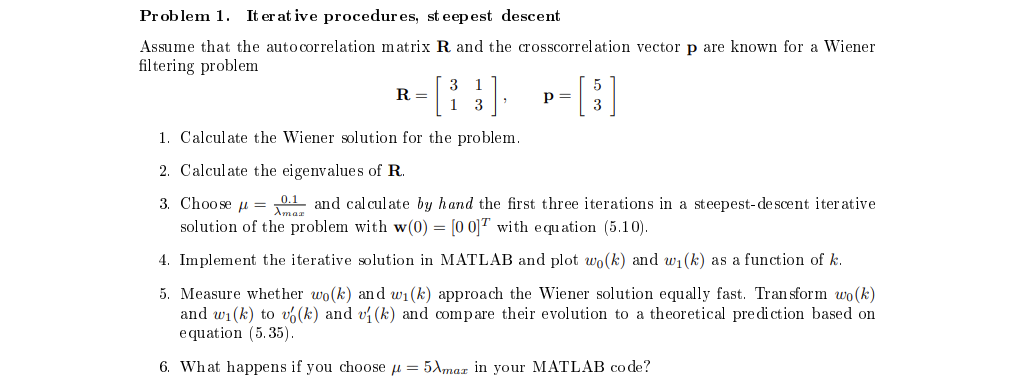

In [45]:
R = np.array([[3,1],[1,3]])
p = np.array([5,3])[:,np.newaxis]

The Wiener solution is given by:

$$
w_o = R^{-1}p
$$

In [46]:
wo = np.linalg.inv(R)@p
wo

array([[1.5],
       [0.5]])

In [47]:
evals, evecs = np.linalg.eig(R)
eval_max = max(evals)
μ = 0.1 / eval_max
w_init = np.array([0,0])[:,np.newaxis]
print("Eigenvalues of Autocorrelation matrix:", evals[0], "and", evals[1])

Eigenvalues of Autocorrelation matrix: 4.0 and 2.0


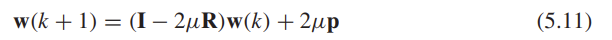

In [34]:
k = 100
ws = [w_init]
for _ in range(k):
    w_next = (np.eye(2) - 2*μ*R)@ws[-1] + 2*μ*p
    ws.append(w_next)
ws = np.array(ws).squeeze()

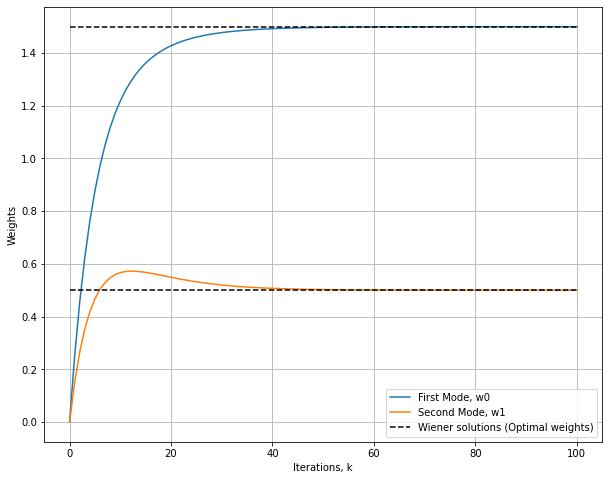

In [35]:
ks = np.linspace(0,k,k+1)
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(ks,ws[:,0], label="First Mode, w0")
ax.plot(ks,ws[:,1], label="Second Mode, w1")
ax.plot(ks,[wo[0]]*len(ks), color='black', linestyle='--', label="Wiener solutions (Optimal weights)")
ax.plot(ks,[wo[1]]*len(ks), color='black', linestyle='--')
ax.set_xlabel("Iterations, k")
ax.set_ylabel("Weights")
ax.grid()
ax.legend()
plt.show()

In [48]:
#Transformation v(k)=w(k)-wo -> v(k)'=Q^Tv(k)
Q = evecs
Λ = np.diag(evals)
k = 100
v0 = w_init - wo
vp0 = Q.T@v0
v_primes = [vp0]
for _ in range(k):
    vp_next = (np.eye(2) - 2*μ*Λ)@v_primes[-1]
    v_primes.append(vp_next)
v_primes = np.array(v_primes).squeeze()

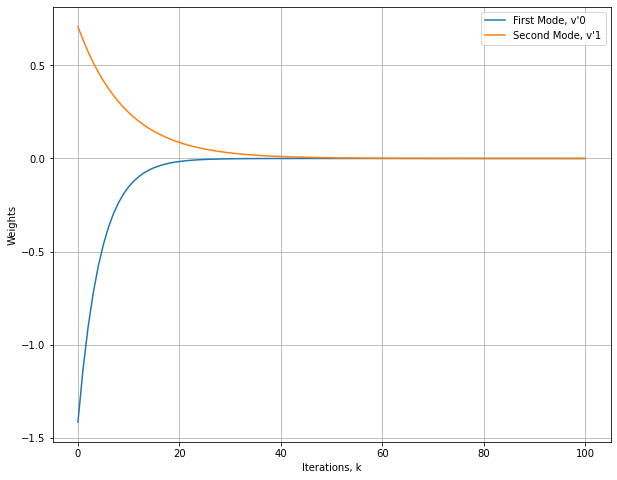

In [50]:
ks = np.linspace(0,k,k+1)
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(ks,v_primes[:,0], label="First Mode, v'0")
ax.plot(ks,v_primes[:,1], label="Second Mode, v'1")
ax.set_xlabel("Iterations, k")
ax.set_ylabel("Weights")
ax.grid()
ax.legend()
plt.show()

In [51]:
meas_0 = [abs(0 - v_primes[i,0]) for i in range(len(v_primes[:,0]))]
meas_1 = [abs(0 - v_primes[i,1]) for i in range(len(v_primes[:,1]))]

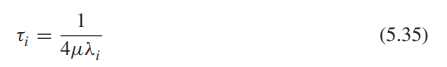

In [52]:
t0 = 1/(4*μ*evals[0]) #Largest eigenvalue
t1 = 1/(4*μ*evals[1]) #Smallest eigenvalue
print("Time Constants for the two modes:", "t_0 =",t0, "t_1 =",t1)

Time Constants for the two modes: t_0 = 2.5 t_1 = 5.0


It follows from the theorectical prediction of equation 5.35 that the mode corresponding to the largest eigenvalue will have the smallest time-constants and thus converge the fastest.

It is here predicted that $v'_0$ will converge twice as fast as $v'_1$

In [53]:
# When the step size is way too large the algorithm becomes unstable and very quickly diverges!
μ_large = 5*eval_max
k_us = 10
v0 = w_init - wo
vp0 = Q.T@v0
vp_unstable = [vp0]
for _ in range(k_us):
    vp_next_us = (np.eye(2) - 2*μ_large*Λ)@vp_unstable[-1]
    vp_unstable.append(vp_next_us)
vp_unstable = np.array(vp_unstable).squeeze()

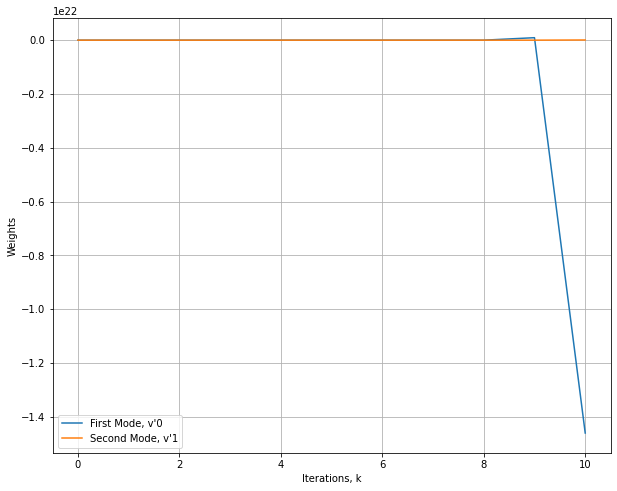

In [54]:
ks_us = np.linspace(0,k_us,k_us+1)
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(ks_us,vp_unstable[:,0], label="First Mode, v'0")
ax.plot(ks_us,vp_unstable[:,1], label="Second Mode, v'1")
ax.set_xlabel("Iterations, k")
ax.set_ylabel("Weights")
ax.grid()
ax.legend()
plt.show()

### Problem 2
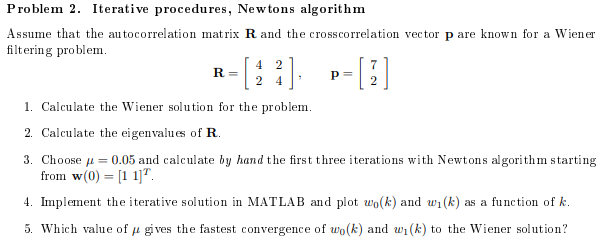

In [21]:
R = np.array([[4,2],[2,4]])
p = np.array([7,2])[:,np.newaxis]

In [22]:
#Optimal weiner solution
wo = np.linalg.inv(R)@p
wo

array([[ 2. ],
       [-0.5]])

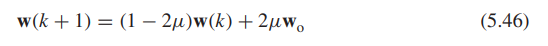

In [23]:
μ = 0.05
w_init = np.array([1,1])[:,np.newaxis]
k = 100
ws = [w_init]
for _ in range(k):
    w_next = (1 - 2*μ)*ws[-1] + 2*μ*wo
    ws.append(w_next)
ws = np.array(ws).squeeze()

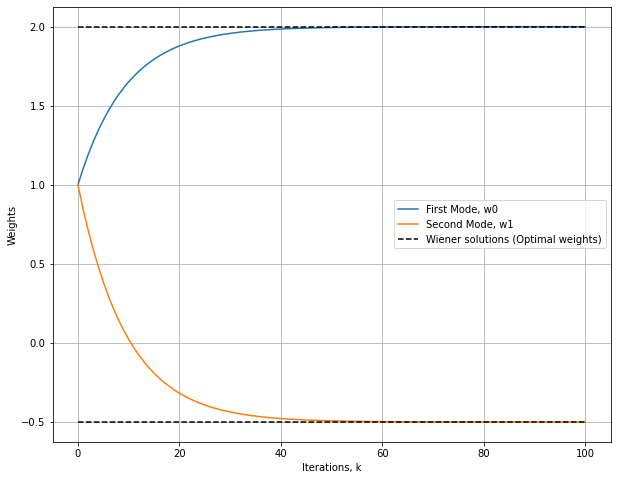

In [24]:
ks = np.linspace(0,k,k+1)
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(ks,ws[:,0], label="First Mode, w0")
ax.plot(ks,ws[:,1], label="Second Mode, w1")
ax.plot(ks,[wo[0]]*len(ks), color='black', linestyle='--', label="Wiener solutions (Optimal weights)")
ax.plot(ks,[wo[1]]*len(ks), color='black', linestyle='--')
ax.set_xlabel("Iterations, k")
ax.set_ylabel("Weights")
ax.grid()
ax.legend()
plt.show()

### Problem 3 
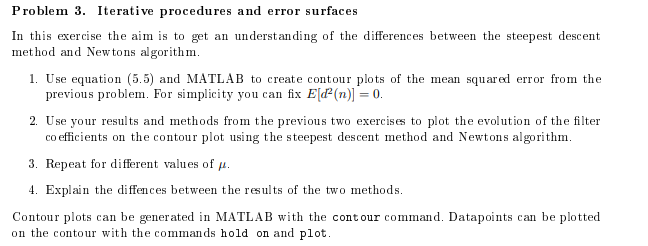

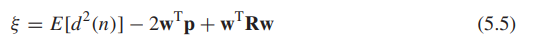

In [55]:
n1 = 186.3j+6.938e8
n2 = 362700j-0.0969
n1/n2

(2.5981501207626463e-06-1912.8756548111394j)

### Problem 4
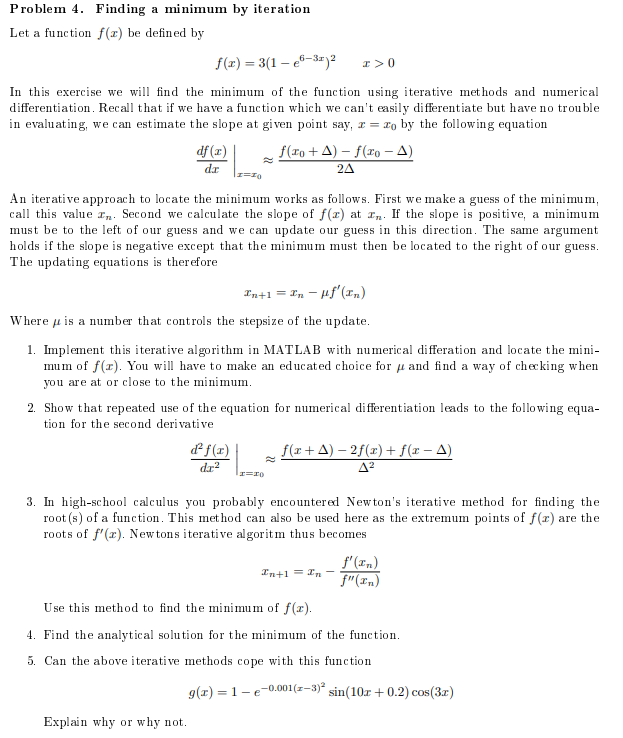

In [25]:
def numDiff(f, x0, h=1e-3): #Numerical differentiation - Takes a defined function and an point of interest
    slope = (f(x0 + h) - f(x0 - h)) / (2*h)
    return slope

def func(x):
    return 3*(1-np.exp(6-3*x))**2

def findMin(f, μ): #Takes the function and the step-size
    x0 = 0
    slope = numDiff(f,x0)
    num_it = 10
    while abs(slope) > 1e-3: #Some defined tolerance of convergence
        slope = numDiff(f, x0)
        x0 += -np.sign(slope)*μ #Opposite direction of the gradient
    min_x = x0
    min_val = f(min_x)
    return min_x, min_val

In [26]:
findMin(func, 0.1)

(2.1000000000000005, 0.201525584191774)